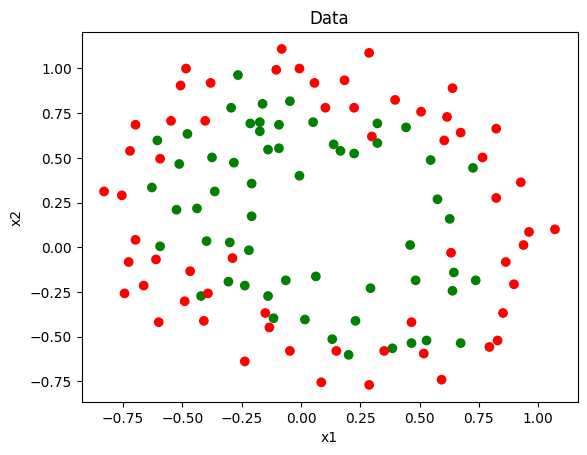

Text(0.5, 1.0, 'Cost History')

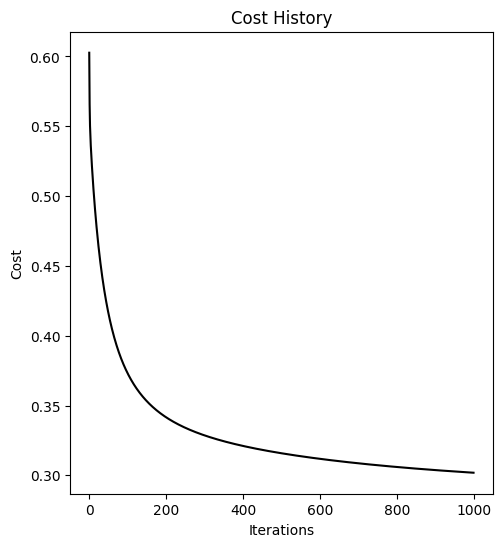

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Load data
data = pd.read_csv('data.txt', sep=',', header=None, names=['x1', 'x2', 'y'])
m = len(data)
x1 = data['x1'].values.reshape(m, 1)
x2 = data['x2'].values.reshape(m, 1)
y = data['y'].values.reshape(m, 1)

# Plot  data
color = ['red' if val == 0 else 'green' for val in y]
plt.scatter(x1, x2, color=color)
plt.title('Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


# Normalize data
def normalize_data(x):
    x_norm = (x - np.mean(x)) / np.std(x)
    return x_norm

x1_norm = normalize_data(x1)
x2_norm = normalize_data(x2)

def generate_poly_features(x1, x2, h):
    features = []
    for i in range(h + 1):
        for j in range(i + 1):
            features.append((x1 ** (i - j)) * (x2 ** j))
    
    return np.column_stack(features)
h = 6
X = generate_poly_features(x1_norm, x2_norm, h)

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define cost function

def compute_cost(x, y, theta):
    m = len(y)  # Number of samples
    epsilon = 1e-15  # Small epsilon to avoid log(0)
    
    # Calculate the loss
    J = -(1/m) * np.sum(y * np.log(sigmoid(x @ theta) + epsilon) + (1 - y) * np.log(1 - sigmoid(x @ theta) + epsilon))
    
    return J


# Define gradient descent for logistic regression
def logistic_regression(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X @ theta)
        gradient = (1 / m) * (X.T @ (h - y))
        theta -= alpha * gradient
        J_history.append(compute_cost(X, y, theta))

    return theta, J_history


# Initialize theta and hyperparameters
initial_theta = np.zeros((X.shape[1], 1)).reshape(X.shape[1], 1)
learning_rate = 0.1
iterations = 1000

# Train logistic regression
theta, J_history = logistic_regression(X, y, initial_theta, learning_rate, iterations)

# Plot cost history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(J_history)), J_history, color='black')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History')





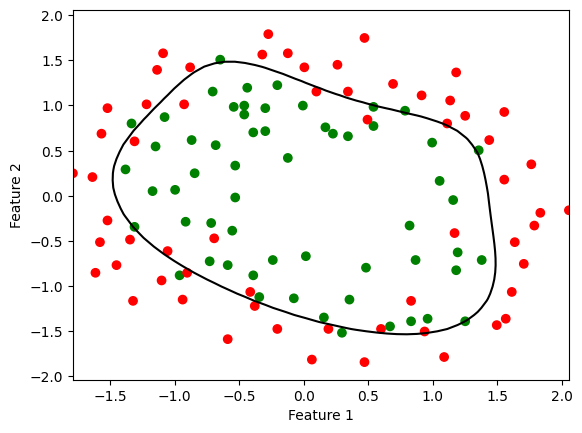

In [202]:
# define a function to plot the decision boundary
min = np.min(x1_norm)
max = np.max(x1_norm)
def plotDecisionBoundary(theta,h, axes,min,max):
    u = np.linspace(min, max)
    v = np.linspace(min, max)
    U,V = np.meshgrid(u,v)
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    X = generate_poly_features(U, V, h)
    Z = X.dot(theta)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U,V,Z,levels=[0],cmap= "Greys_r")
    return cs


fig, axes = plt.subplots();
axes.set_xlabel('Feature 1')
axes.set_ylabel('Feature 2')
axes.scatter(x1_norm, x2_norm, color=color)

plotDecisionBoundary(theta, h, axes,min ,max)
